<a href="https://colab.research.google.com/github/Astha062902/Predictive_Image_Detection_for_Assessing_the_Extent_of_Damage/blob/main/Extent_Of_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import os


In [80]:
# Load images from the specified folder
def load_images_from_folder(folder_path, image_size=(512, 360)):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
            img = cv2.resize(img, image_size)  # Resize to a consistent size
            images.append(img)
    return images

# Load labels from CSV
def load_labels_from_csv(csv_file):
    df = pd.read_csv(csv_file)
    filenames = df['Image_ID'].tolist()
    labels = df['Label'].tolist()
    return filenames, labels

# Load images and labels
images = load_images_from_folder("/content/drive/MyDrive/Dataset")
filenames, labels = load_labels_from_csv("/content/drive/MyDrive/labels.csv")

# Convert labels to numerical values (0 for minimal disaster, 1 for extensive disaster)
label_encoder = LabelEncoder()

# Map your labels to numerical values (replace 'before' and 'after' with your actual labels)
label_mapping = {"Before": 0, "After": 1}
y = [label_mapping[label] for label in labels]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

# Normalize image data (if needed)
X_train = np.array(X_train) / 350.0
X_test = np.array(X_test) / 350.0


In [81]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(360, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])


In [89]:
import numpy as np

# Convert your training data and labels to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Now, you can train your model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
7/7 [==============================] - 1s 186ms/step - loss: 0.0404 - accuracy: 0.9854 - val_loss: 0.5783 - val_accuracy: 0.6538
Epoch 2/10
7/7 [==============================] - 1s 163ms/step - loss: 0.0393 - accuracy: 0.9854 - val_loss: 0.5797 - val_accuracy: 0.6346
Epoch 3/10
7/7 [==============================] - 1s 155ms/step - loss: 0.0258 - accuracy: 0.9902 - val_loss: 0.5889 - val_accuracy: 0.7115
Epoch 4/10
7/7 [==============================] - 1s 196ms/step - loss: 0.0239 - accuracy: 0.9854 - val_loss: 0.5648 - val_accuracy: 0.6154
Epoch 5/10
7/7 [==============================] - 1s 174ms/step - loss: 0.0282 - accuracy: 0.9854 - val_loss: 0.6521 - val_accuracy: 0.6923
Epoch 6/10
7/7 [==============================] - 1s 199ms/step - loss: 0.0232 - accuracy: 0.9902 - val_loss: 0.5433 - val_accuracy: 0.7115
Epoch 7/10
7/7 [==============================] - 1s 157ms/step - loss: 0.0211 - accuracy: 0.9854 - val_loss: 0.5522 - val_accuracy: 0.6346
Epoch 8/10
7/7 [====

In [90]:
import numpy as np

# Convert y_test to a NumPy array
y_test = np.array(y_test)

# Now, you can evaluate your model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.3f}")


3/3 [==============================] - 0s 36ms/step - loss: 0.6551 - accuracy: 0.7077
Test accuracy: 0.708


**Training and Validation Loss Curves**:

To visualize how the training and validation loss change over epochs, you can create loss curves.

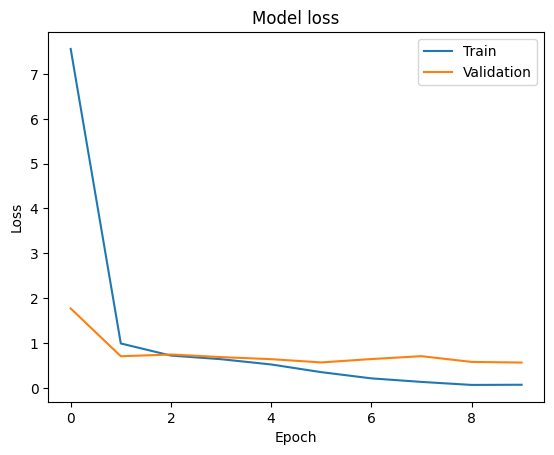

In [84]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


**Training and Validation Accuracy Curves**:

To visualize how the training and validation accuracy change over epochs, you can create accuracy curves.

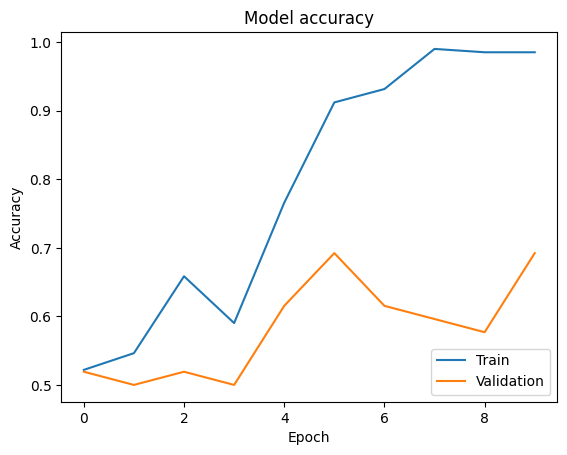

In [85]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


**Confusion Matrix:**

A confusion matrix can help you understand how well your model is classifying samples.

3/3 [==============================] - 0s 48ms/step


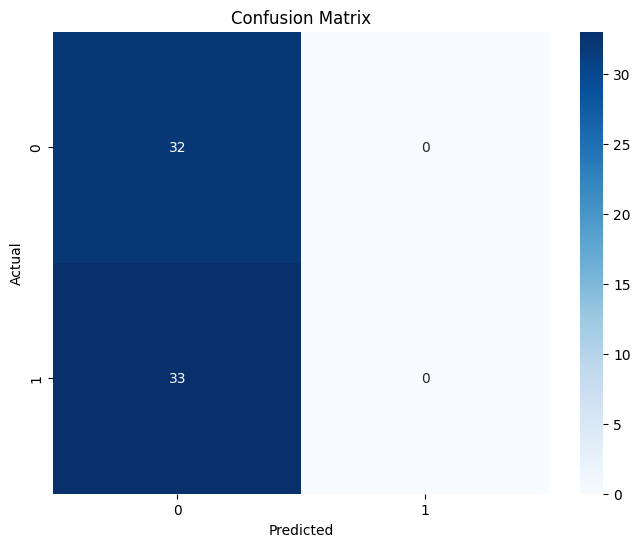

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**ROC Curve and AUC (Area Under the ROC Curve):**

If you're dealing with binary classification, you can create an ROC curve to visualize the trade-off between true positive rate and false positive rate.

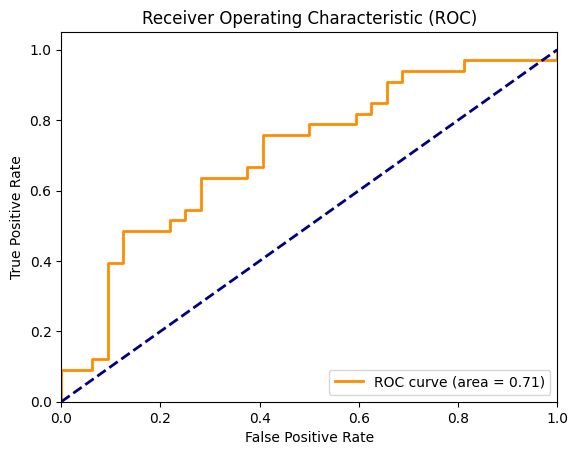

In [87]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
#fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])  # Assuming binary classification
#roc_auc = auc(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, y_pred)  # No need to index y_pred
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred)  # No need to index y_pred
roc_auc = auc(fpr, tpr)



**Precision-Recall Curve:**

To evaluate the precision-recall trade-off, you can create a precision-recall curve.

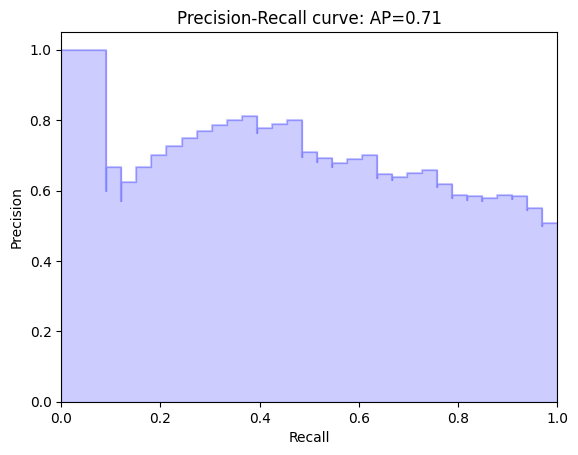

In [88]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)  # Assuming binary classification
average_precision = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()
